In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import cv2
from scipy.ndimage import shift as scishift
import matplotlib.pyplot as plt
import numpy as np

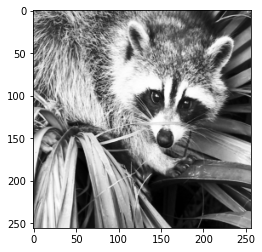

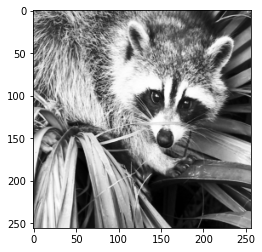

In [41]:
x = cv2.imread('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/Images/X.png')
x0 = x[:, :, 0]
x1 = x[:, :, 1]
x2 = x[:, :, 2]


def histoo(img_array):
  histogram_array = np.bincount(img_array.flatten(), minlength=256)
  histogram_array = np.cumsum(histogram_array / np.sum(histogram_array))
  transform_map = np.floor(255 * histogram_array).astype(np.uint8)
  eq_img_list = [transform_map[p] for p in list(img_array.flatten())]

  return np.reshape(np.asarray(eq_img_list), img_array.shape)

new0 = histoo(x0)
new1 = histoo(x1)
new2 = histoo(x2)
xx = np.zeros((256, 256, 3))
for i in range(256):
  for j in range(256):
    xx[i, j, 0] = new0[i, j]
    xx[i, j, 1] = new1[i, j]
    xx[i, j, 2] = new2[i, j]
plt.imshow(xx.astype(int))
plt.show()
plt.imshow(xx.astype(int))
plt.show()

In [55]:
from numpy.fft import fft2
import imageio

a = imageio.imread('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/Images/a.png')
b = imageio.imread('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/Images/b.png')

a_dft = fft2(a)
b_dft = fft2(b)
a_abs = np.absolute(a_dft)
a_pha = np.angle(a_dft)
b_abs = np.absolute(b_dft)
b_pha = np.angle(b_dft)
a_with_b = a_abs * np.exp(1j * b_pha)
b_with_a = b_abs * np.exp(1j * a_pha)

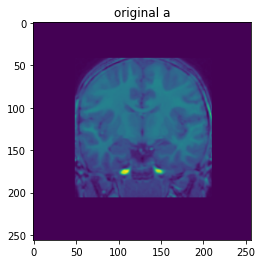

In [52]:
plt.imshow(a)
plt.title('original a')
plt.show()

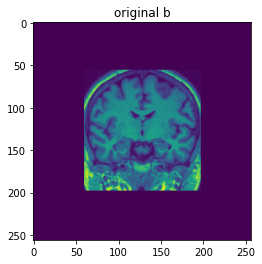

In [53]:
plt.imshow(b)
plt.title('original b')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


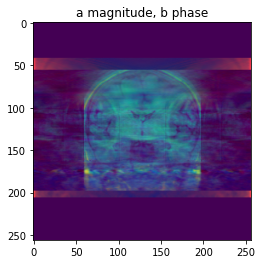

In [46]:
plt.imshow(np.fft.ifft2(a_with_b).astype(int))
plt.title('a magnitude, b phase')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


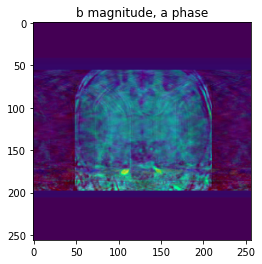

In [56]:
plt.imshow(np.fft.ifft2(b_with_a).astype(int))
plt.title('b magnitude, a phase')
plt.show()

# The new origin of the new image's phase had more of an impact than magnitude - for example the image that used a magnitude and b phase looks more similar to b.

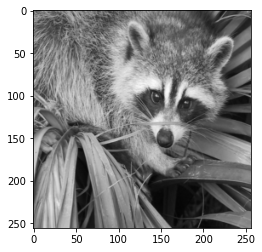

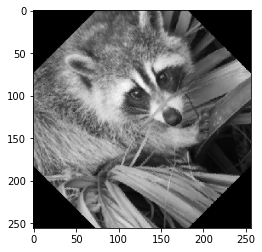

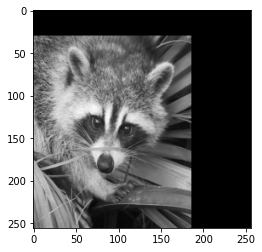

In [57]:
#3
x = cv2.imread('/content/gdrive/MyDrive/Cornell-Tech-Github/Digital-Signal-Processing/Images/X.png')
plt.imshow(x)
plt.show()
plt.imshow(rotate2D(x, 45))
plt.show()
plt.imshow(translate2D(x, (30, -70)))
plt.show()

In [49]:
def rotate2D(image, angle):
  origin_x = image.shape[0] // 2
  origin_y = image.shape[1] // 2
  final = np.zeros(image.shape)
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      current_angle = np.angle(np.complex(x - origin_x, y - origin_y), deg=True)
      magnitude = np.sqrt((x - origin_x) ** 2 + (y - origin_y) ** 2)
      transform_x = magnitude * np.cos((current_angle + angle) * np.pi / 180) + origin_x
      transform_y = magnitude * np.sin((current_angle + angle) * np.pi / 180)  + origin_y
      for new_x in [int(transform_x // 1), int((transform_x + 0.999) // 1)]:
        for new_y in [int(transform_y // 1), int((transform_y + 0.999) // 1)]:
          for new_z in range(image.shape[2]):
            if new_x < image.shape[0] and new_x >= 0 and new_y < image.shape[1] and new_y >= 0 and final[new_x,new_y,new_z] == 0:
              final[new_x, new_y, new_z] = image[x, y, new_z]
  return final.astype(int)
        



In [50]:
def translate2D(image, shift):
  final = np.zeros((image.shape[0] + 2 * np.abs(shift[0]), image.shape[1] + 2 * np.abs(shift[1]), 3))
  for x in range(image.shape[0]):
    for y in range(image.shape[1]):
      for z in range(image.shape[2]):
        final[x + np.abs(shift[0]) + shift[0], y + shift[1] + np.abs(shift[1]), z] = image[x, y, z]
  return final[np.abs(shift[0]):image.shape[0] + np.abs(shift[0]), np.abs(shift[1]):image.shape[1] + np.abs(shift[1]), :].astype(int)
